In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\bryan\Desktop\Data SCi\2021-ML-Course\08-Linear-Regression-Models\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
X=df[['TV','radio','newspaper']]
y=df['sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Linear Regression

Linear Regression MAE is:  1.402312498938507
Linear Regression RMSE is:  1.6970632663793623


Text(0.5, 1.0, 'Linear Reg')

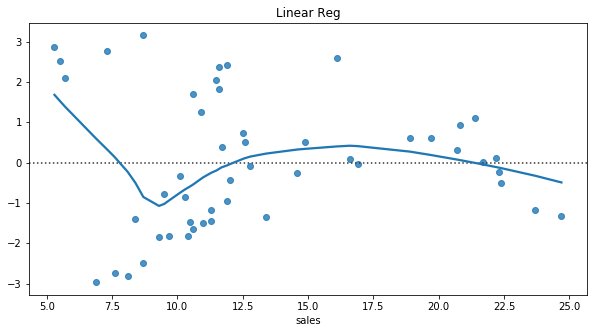

In [6]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
yhat=lm.predict(X_test)

print("Linear Regression MAE is: ",mean_absolute_error(y_test,yhat))
print("Linear Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat)))

plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat,lowess=True)
plt.title('Linear Reg')

Comparing results by standardising data before fitting the model

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_trans=scaler.fit_transform(X_train)
xtest_trans=scaler.fit_transform(X_test)

lm.fit(xtrain_trans,y_train)
yhat_trans=lm.predict(xtest_trans)

print("Standardized Linear Regression MAE is: ",mean_absolute_error(y_test,yhat_trans))
print("Standardized Linear Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat_trans)))


Standardized Linear Regression MAE is:  1.4928637427863973
Standardized Linear Regression RMSE is:  2.0409282382388922


Text(0.5, 1.0, 'Transformed Data Linear Reg')

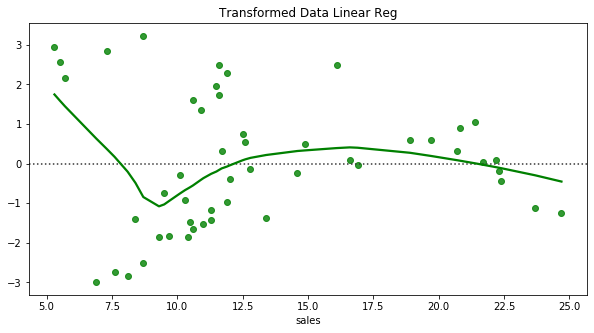

In [8]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_trans,lowess=True,color='g')
plt.title('Transformed Data Linear Reg')

*Thus we can see that Standardized data lead to a higher MAE and RMSE than non standardized data*

**Now Running Ridge Regression**

In [9]:
from sklearn.linear_model import RidgeCV,Ridge

In [10]:
rid_CV=RidgeCV(alphas=(0.01,0.1, 1.0, 10.0,100),cv=5)
rid_CV.fit(xtrain_trans,y_train)
print("The optimal Alpha value: ",rid_CV.alpha_)

The optimal Alpha value:  0.1


In [11]:
rid=Ridge(alpha=0.1,max_iter=10000)
rid.fit(xtrain_trans,y_train)
yhat_ridge=rid.predict(xtest_trans)

print("Ridge Regression MAE is: ",mean_absolute_error(y_test,yhat_ridge))
print("Ridge Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat_ridge)))

Ridge Regression MAE is:  1.4920137895226098
Ridge Regression RMSE is:  2.040920553788834


Text(0.5, 1.0, 'Ridge Reg')

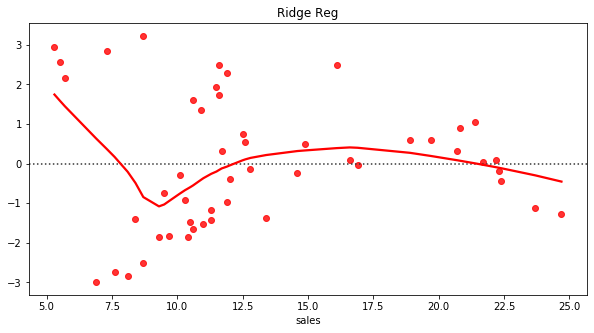

In [12]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_ridge,lowess=True,color='r')
plt.title('Ridge Reg')

**Now Running Lasso Regression**

In [13]:
from sklearn.linear_model import LassoCV,Lasso
lassCV=LassoCV(eps=0.001,n_alphas=200,max_iter=100000)
lassCV.fit(xtrain_trans,y_train)
lassCV.alpha_

0.07603236983521164

In [14]:
lass=Lasso(alpha=lassCV.alpha_)
lass.fit(xtrain_trans,y_train)
yhat_lass=lass.predict(xtest_trans)

print("Lasso Regression MAE is: ",mean_absolute_error(y_test,yhat_ridge))
print("Lasso Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat_ridge)))

Lasso Regression MAE is:  1.4920137895226098
Lasso Regression RMSE is:  2.040920553788834


Text(0.5, 1.0, 'Lasso Reg')

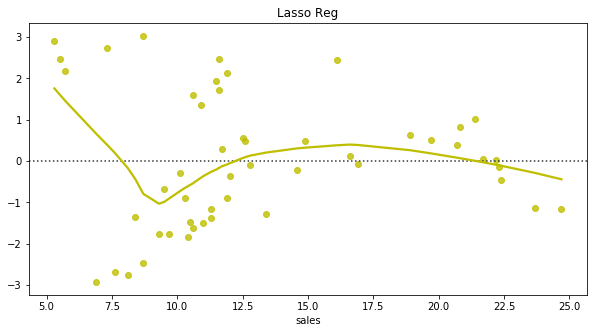

In [15]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_lass,lowess=True,color='y')
plt.title('Lasso Reg')

**Now checking with Elastic Net**

In [16]:
from sklearn.linear_model import ElasticNetCV

In [17]:
enet=ElasticNetCV(l1_ratio=[0.01,0.1,0.5,0.75,0.9,1],cv=5)
enet.fit(xtrain_trans,y_train)
yhat_el=enet.predict(xtest_trans)

print("Elastic Net Regression MAE is: ",mean_absolute_error(y_test,yhat_el))
print("Elastic Net Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat_el)))

Elastic Net Regression MAE is:  1.4619392439502183
Elastic Net Regression RMSE is:  2.0333981649538093


Text(0.5, 1.0, 'Elastic Net Reg')

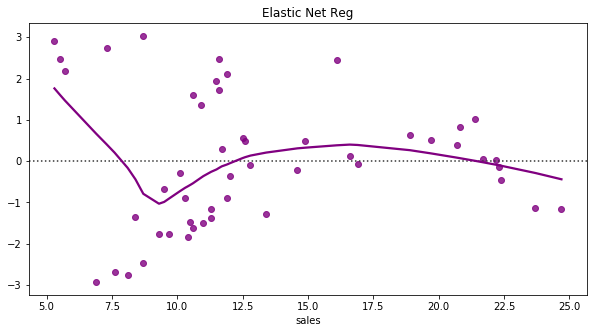

In [18]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_el,lowess=True,color='purple')
plt.title('Elastic Net Reg')

**Lastly we check performance using Polynomial Regression**

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
rmse_test=[]
rmse_train=[]
for d in range(1,15):
    poly=PolynomialFeatures(degree=d)
    poly_features = poly.fit_transform(X)
    X_train1,X_test1, y_train1, y_test1 = train_test_split(poly_features, y, test_size=0.25, random_state=42)
    lm1=LinearRegression()
    lm1.fit(X_train1,y_train1)
    yhat_poly=lm1.predict(X_test1)
    yhat_poly_train=lm1.predict(X_train1)
    
    rmse1_test=np.sqrt(mean_squared_error(y_test1,yhat_poly))
    rmse1_train=np.sqrt(mean_squared_error(y_train1,yhat_poly_train))
    
    rmse_test.append(rmse1_test)
    rmse_train.append(rmse1_train)

Text(0.5, 1.0, 'Zoomed in view of RMSE vs Complexity')

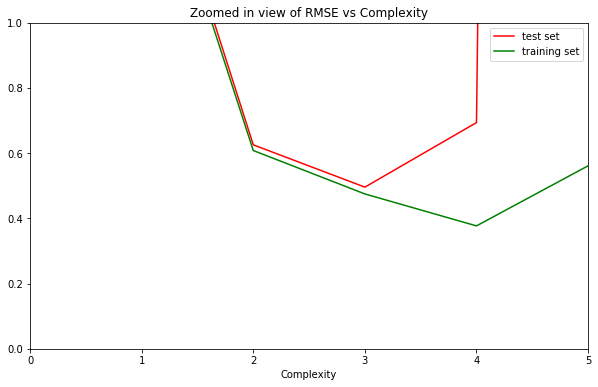

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),rmse_test,'r',label='test set')
plt.plot(range(1,15),rmse_train,'g',label='training set')
plt.ylim(0,1)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Complexity') 
plt.title('Zoomed in view of RMSE vs Complexity')

*From The above graph it is clear that d=3 is the optimal value of degree for Polynomial*

In [22]:
poly=PolynomialFeatures(degree=3)
poly_features = poly.fit_transform(X)
X_train1,X_test1, y_train1, y_test1 = train_test_split(poly_features, y, test_size=0.25, random_state=42)
lm2=LinearRegression()
lm2.fit(X_train1,y_train1)
yhat_poly2=lm2.predict(X_test1)

print("polynomial Regression MAE is: ",mean_absolute_error(y_test,yhat_poly2))
print("Polynomial Regression RMSE is: ",np.sqrt(mean_squared_error(y_test,yhat_poly2)))

polynomial Regression MAE is:  0.353524881207919
Polynomial Regression RMSE is:  0.49568315183715067


Text(0.5, 1.0, 'Polynomial Reg')

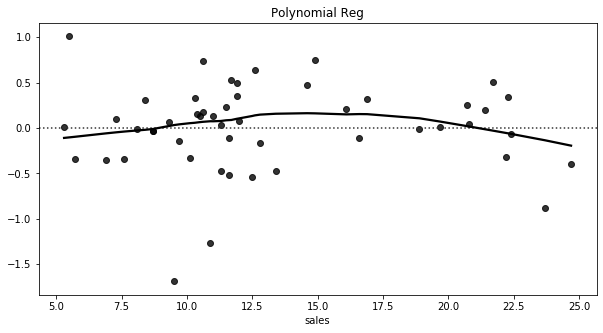

In [23]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_poly2,lowess=True,color='k')
plt.title('Polynomial Reg')

**Therefore, from the Residual plots and the computed Root Mean Square Values, we can conclude that the model using Polynomial Regression of order 3 fits the data best**

## Grid Search CV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [25]:
estimator=ElasticNet()
param_grid={'alpha':[0,0.01,0.1,1,10,100,120,140,150],'l1_ratio':[0.001,0.01,0.1,1,10]}
grid_model=GridSearchCV(estimator=estimator,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [26]:
grid_model.fit(xtrain_trans,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] alpha=0, l1_ratio=0.001 .........................................
[CV] .......................... alpha=0, l1_ratio=0.001, total=   0.0s
[CV] alpha=0, l1_ratio=0.001 .........................................
[CV] .......................... alpha=0, l1_ratio=0.001, total=   0.0s
[CV] alpha=0, l1_ratio=0.001 .........................................
[CV] .......................... alpha=0, l1_ratio=0.001, total=   0.0s
[CV] alpha=0, l1_ratio=0.001 .........................................
[CV] .......................... alpha=0, l1_ratio=0.001, total=   0.0s
[CV] alpha=0, l1_ratio=0.001 .........................................
[CV] .......................... alpha=0, l1_ratio=0.001, total=   0.0s
[CV] alpha=0, l1_ratio=0.01 ..........................................
[CV] ........................... alpha=0, l1_ratio=0.01, total=   0.0s
[CV] alpha=0, l1_ratio=0.01 ..........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.31451023997582, tolerance: 0.32768800000000003
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With 

[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.0s
[CV] alpha=0.1, l1_ratio=1 ...........................................
[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.0s
[CV] alpha=0.1, l1_ratio=1 ...........................................
[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.0s
[CV] alpha=0.1, l1_ratio=10 ..........................................
[CV] ........................... alpha=0.1, l1_ratio=10, total=   0.0s
[CV] alpha=0.1, l1_ratio=10 ..........................................
[CV] ........................... alpha=0.1, l1_ratio=10, total=   0.0s
[CV] alpha=0.1, l1_ratio=10 ..........................................
[CV] ........................... alpha=0.1, l1_ratio=10, total=   0.0s
[CV] alpha=0.1, l1_ratio=10 ..........................................
[CV] ........................... alpha=0.1, l1_ratio=10, total=   0.0s
[CV] alpha=0.1, l1_ratio=10 ..........................................
[CV] .

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.32768800000000003
  positive)
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.3334871666666667
  positive)
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.299973325
  positive)
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.3011809916666667
  posi

[CV] ........................ alpha=120, l1_ratio=0.001, total=   0.0s
[CV] alpha=120, l1_ratio=0.01 ........................................
[CV] ......................... alpha=120, l1_ratio=0.01, total=   0.0s
[CV] alpha=120, l1_ratio=0.01 ........................................
[CV] ......................... alpha=120, l1_ratio=0.01, total=   0.0s
[CV] alpha=120, l1_ratio=0.01 ........................................
[CV] ......................... alpha=120, l1_ratio=0.01, total=   0.0s
[CV] alpha=120, l1_ratio=0.01 ........................................
[CV] ......................... alpha=120, l1_ratio=0.01, total=   0.0s
[CV] alpha=120, l1_ratio=0.01 ........................................
[CV] ......................... alpha=120, l1_ratio=0.01, total=   0.0s
[CV] alpha=120, l1_ratio=0.1 .........................................
[CV] .......................... alpha=120, l1_ratio=0.1, total=   0.0s
[CV] alpha=120, l1_ratio=0.1 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.01, 0.1, 1, 10, 100, 120, 140, 150],
                         'l1_ratio': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [29]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [30]:
yhat_grid=grid_model.predict(xtest_trans)

In [31]:
print("The RMSE using GridSearchCV is: ",np.sqrt(mean_squared_error(y_test,yhat_grid)))

The RMSE using GridSearchCV is:  2.033652401265493


Text(0.5, 1.0, 'Polynomial Reg')

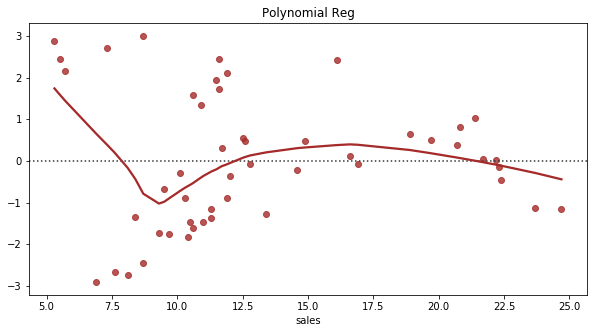

In [32]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,yhat_grid,lowess=True,color='brown')
plt.title('Polynomial Reg')